In [1]:
from numpy import *
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as figure

In [2]:
def getData():
	data = loadtxt("./sample.txt", skiprows = 1, dtype = float)
	return data

In [3]:
def jumpDetector(signal):
    dif = 0.0
    j = []
    r = []
    for i in range(0, len(signal)):
        if i > scope and i < len(signal) - scope:
            jump = signal[i-1] - signal[i]
            if abs(jump) > curl:
                dif = dif + mean(signal[i-1-scope:i-1]) - mean(signal[i:i+scope])
                j.append((x[i], y[i]))
        r.append(signal[i] + dif)
    return r, j

In [4]:
def getFreq():
	fsample = 1 / (x[1] - x[0])       
	fnyquist = 0.5 * fsample          
	return fsample, fnyquist

In [5]:
def filter(signal): 
	#https://docs.scipy.org/doc/scipy/reference/signal.html
	normal_cutoff = fcutoff / fnyquist 
	b, a = butter(order, normal_cutoff, btype='lowpass', analog=False) 
	filtered_y = lfilter(b, a, signal)
	return filtered_y, a, b

In [6]:
# parameters
fcutoff = 10
order = 2
curl = 0.6
scope = 30
plot_freq = 1

In [7]:
data = getData()
x = list(data[:,0])
y = list(data[:,1])

In [8]:
fsample, fnyquist = getFreq()
y, jumps = jumpDetector(data[:,1])
y, a, b = filter(y)

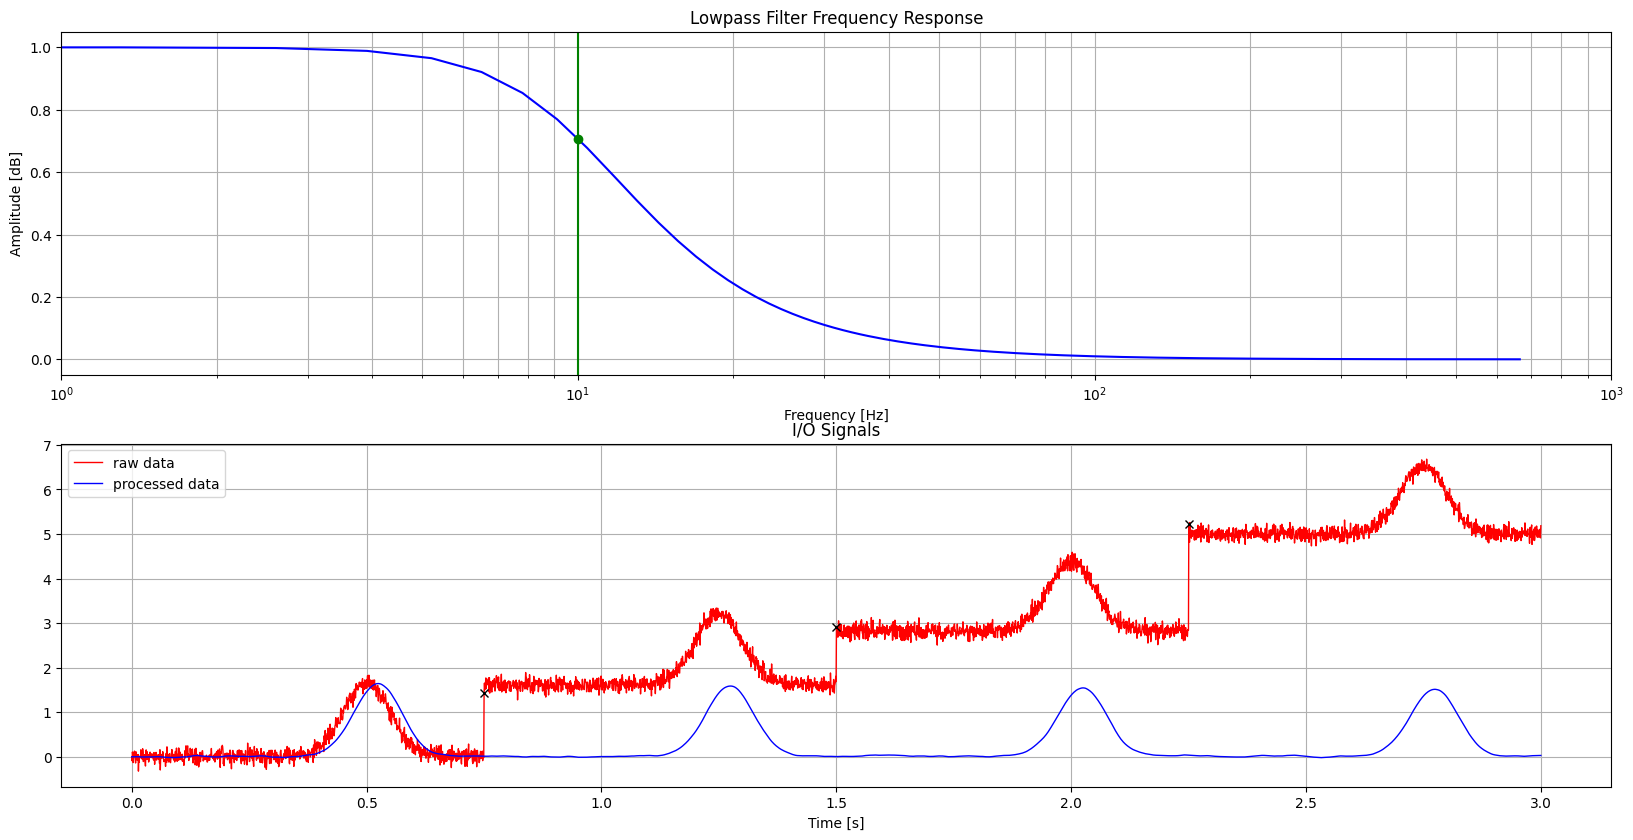

In [10]:
if(plot_freq):
    w, h = freqz(b, a)
    figure.subplot(2, 1, 1)
    figure.plot(fsample * w / 2.0 / math.pi, abs(h), 'b')
    figure.plot(fcutoff, sqrt(2) / 2.0, 'go')
    figure.xscale('log')
    figure.axvline(fcutoff, color='g')
    figure.xlim(1, 1000)
    figure.title("Lowpass Filter Frequency Response")
    figure.xlabel('Frequency [Hz]')
    figure.ylabel('Amplitude [dB]')
    figure.grid(which='both', axis='both')
    figure.subplot(2, 1, 2)

figure.plot(x, data[:,1], 'r-', linewidth=1, label='raw data')
figure.plot(x, y,         'b-', linewidth=1, label='processed data')
for j in range(0, len(jumps)):
    figure.plot(jumps[j][0], jumps[j][1], 'kx', linewidth=2)
figure.title("I/O Signals")
figure.xlabel('Time [s]')
figure.grid()
figure.legend()
figure.rcParams['figure.figsize'] = [20, 10]
figure.rcParams['figure.dpi'] = 100
figure.show()